<a href="https://colab.research.google.com/github/adelriscom/DataScience/blob/main/project_4__Alexander_Del_Risco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In this project, you will work on an open and real dataset, Real Estate Listings in
Mexico. This dataset includes both rent and sale data for properties in Mexico.
Properati is a competitive marketplace for Latin American real estate that strives to
assist consumers in purchasing and renting homes, while simultaneously providing
location-specific property databases for the public.

## One interesting analysis question could be:
+ What are the key factors that influence property prices in urban areas of Mexico?

+ This question could be further broken down into sub-questions such as:

+ What is the average price of properties in urban areas of Mexico?
+ Which types of properties (apartment, house, etc.) have the highest and lowest prices?
+ Does the location (neighborhood, proximity to amenities) have an impact on property prices?
+ What is the correlation between surface area and property prices?
+ How has the average property price changed over time?

In [4]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import folium
from IPython.display import display



In [20]:
data_estate = pd.read_csv('/content/drive/MyDrive/DataScience_UWinnipeg/properati_properties_Mexico.csv')
print(data_estate.shape)
display(data_estate.head())

(3148360, 21)


,Unnamed: 0,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat,...,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,title
0,0,f148cbb2c2ff6ad7476f44d219b7af14bc717754,2015-01-05,rent,house,Morelos,|México|Morelos|,México,Morelos,18.824124,...,10000.0,MXN,11184.51,631.99,500.0,1.263980,NaN,NaN,NaN,LINDA CASA EN ZONA COMERCIAL IDEAL PARA OFICINAS
1,1,5450e023897c87100feb23fc4d5ecec1ac1658d4,2015-01-05,rent,house,Morelos,|México|Morelos|,México,Morelos,18.825402,...,20000.0,MXN,22485.30,1270.55,480.0,2.646979,NaN,NaN,NaN,PRECIOSA CASA SOBRE AVENIDA IMPORTANTE
2,2,e11cfdc485256c33a8af75e9b614293efdea5c05,2015-01-05,rent,store,Morelos,|México|Morelos|,México,Morelos,18.823515,...,5000.0,MXN,5652.51,319.40,180.0,1.774444,NaN,NaN,NaN,INTERESANTE LOCAL EN RENTA FRENTE AL CANARIO
3,3,c108c5e0def8a486e4d43945aa4e7cef1dda5cae,2015-01-05,rent,store,Tabasco,|México|Tabasco|,México,Tabasco,17.994583,...,8000.0,MXN,7586.83,428.70,528.0,0.811932,NaN,NaN,NaN,"Plaza Moro, Cardenas, Tabasco"
4,4,577da74be713b9df810ef4e5100d9c374bb7441f,2015-02-22,rent,house,Querétaro,|México|Querétaro|,México,Querétaro,NaN,...,10000.0,MXN,11711.01,661.74,NaN,NaN,62.5,NaN,NaN,Casa en Renta en San Juan del Río


## Here is a summary of the columns:

+ Unnamed: 0: an index column that was likely created during the DataFrame's creation
+ id: a unique identifier for each property listing
+ created_on: the date when the property listing was created
+ operation: the type of operation (e.g., sell, rent)
+ property_type: the type of property (e.g., apartment, house)
+ place_name: the name of the city or neighborhood where the property is located
+ place_with_parent_names: the name of the city or neighborhood, along with its parent locations (e.g., country, state)
+ country_name: the name of the country where the property is located
+ state_name: the name of the state or province where the property is located
+ lat: the latitude of the property's location
+ lon: the longitude of the property's location
+ price: the price of the property
+ currency: the currency in which the price is denominated
+ price_aprox_local_currency: the price in the local currency of the property's location
+ price_aprox_usd: the price in US dollars
+ surface_total_in_m2: the total surface area of the property
+ price_usd_per_m2: the price per square meter in US dollars
+ price_per_m2: the price per square meter in the currency of the property's location
+ rooms: the number of rooms in the property
+ expenses: any additional expenses associated with the property (e.g., HOA fees)
+ title: the title of the property listing

## classify columns into categorical and quantitative variables

In [21]:
def check_variables(df: pd.DataFrame):
  cols = df.columns
  quantitative_cols = df._get_numeric_data().columns
  categorical_cols = list(set(cols) - set(quantitative_cols))
  return categorical_cols, list(set(quantitative_cols))

cat_cols, quan_cols = check_variables(data_estate)
print(f'categorical columns: {cat_cols}')
print(f'quantitative columns: {quan_cols}')

categorical columns: ['place_with_parent_names', 'property_type', 'id', 'country_name', 'operation', 'currency', 'created_on', 'title', 'place_name', 'state_name']
quantitative columns: ['rooms', 'price_aprox_usd', 'lat', 'price_usd_per_m2', 'Unnamed: 0', 'lon', 'expenses', 'price_aprox_local_currency', 'surface_total_in_m2', 'price_per_m2', 'price']


In [22]:
data_estate.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148360 entries, 0 to 3148359
Data columns (total 21 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  3148360 non-null  int64  
 1   id                          3148360 non-null  object 
 2   created_on                  3148360 non-null  object 
 3   operation                   3148360 non-null  object 
 4   property_type               3148360 non-null  object 
 5   place_name                  3148360 non-null  object 
 6   place_with_parent_names     3148360 non-null  object 
 7   country_name                3148360 non-null  object 
 8   state_name                  3148360 non-null  object 
 9   lat                         2305882 non-null  float64
 10  lon                         2305882 non-null  float64
 11  price                       3113027 non-null  float64
 12  currency                    3010920 non-null  object 
 1

># Missing values
+ # Check for missing values

In [23]:
print(data_estate.isnull().sum())

Unnamed: 0                          0
id                                  0
created_on                          0
operation                           0
property_type                       0
place_name                          0
place_with_parent_names             0
country_name                        0
state_name                          0
lat                            842478
lon                            842478
price                           35333
currency                       137440
price_aprox_local_currency      35333
price_aprox_usd                 35333
surface_total_in_m2           1532951
price_usd_per_m2              1984460
price_per_m2                   566846
rooms                         3040116
expenses                      3127598
title                               0
dtype: int64


>>If some columns have more than 70% of missing values, it might be better to drop those columns entirely instead of imputing missing values. In this case, dropping columns with a high percentage of missing values will not result in a significant loss of information.

# calculate the percentage of missing values in each column

In [24]:
# Calculate the percentage of missing values in each column
percent_missing = round(data_estate.isnull().sum() * 100 / len(data_estate))

# Create a table to display the results
missing_value_df = pd.DataFrame({'column_name': data_estate.columns,
                                 'percent_missing': percent_missing})

# Sort the table by the percentage of missing values
missing_value_df = missing_value_df.sort_values('percent_missing', ascending=False)

# Print the table
print(missing_value_df)


                                           column_name  percent_missing
expenses                                      expenses             99.0
rooms                                            rooms             97.0
price_usd_per_m2                      price_usd_per_m2             63.0
surface_total_in_m2                surface_total_in_m2             49.0
lon                                                lon             27.0
lat                                                lat             27.0
price_per_m2                              price_per_m2             18.0
currency                                      currency              4.0
price                                            price              1.0
price_aprox_usd                        price_aprox_usd              1.0
price_aprox_local_currency  price_aprox_local_currency              1.0
Unnamed: 0                                  Unnamed: 0              0.0
id                                                  id          

In [10]:
print(data_estate.shape)

(3148360, 21)


># Cleaning Dataset

These columns were deleted: ['id','title','expenses','Unnamed']

data_estate = data_estate.drop(['id','title','expenses','Unnamed'], axis=1)

In [25]:
data_estate=data_estate.drop(['id','title', 'expenses', 'place_with_parent_names', 'currency', 'country_name', 'Unnamed: 0'], axis=1)

In [26]:
print(data_estate.shape)
display(data_estate.head())

(3148360, 14)


,created_on,operation,property_type,place_name,state_name,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms
0,2015-01-05,rent,house,Morelos,Morelos,18.824124,-98.948113,10000.0,11184.51,631.99,500.0,1.263980,NaN,NaN
1,2015-01-05,rent,house,Morelos,Morelos,18.825402,-98.946803,20000.0,22485.30,1270.55,480.0,2.646979,NaN,NaN
2,2015-01-05,rent,store,Morelos,Morelos,18.823515,-98.949789,5000.0,5652.51,319.40,180.0,1.774444,NaN,NaN
3,2015-01-05,rent,store,Tabasco,Tabasco,17.994583,-93.386271,8000.0,7586.83,428.70,528.0,0.811932,NaN,NaN
4,2015-02-22,rent,house,Querétaro,Querétaro,NaN,NaN,10000.0,11711.01,661.74,NaN,NaN,62.5,NaN


## Deletion of repeated rows

In [27]:
print(f'Size prior to removing repeated rows: {data_estate.shape}')
data_estate.drop_duplicates(inplace=True)
print(f'Size after to removing repeated rows: {data_estate.shape}')


Size before delete repeted rows: (3148360, 14)
Size after delete repeted rows: (1705789, 14)


>># Calculate the percentage of missing values in each column

In [28]:
# Calculate the percentage of missing values in each column
percent_missing = round(data_estate.isnull().sum() * 100 / len(data_estate))

# Create a table to display the results
missing_value_df = pd.DataFrame({'column_name': data_estate.columns,
                                 'percent_missing': percent_missing})

# Sort the table by the percentage of missing values
missing_value_df = missing_value_df.sort_values('percent_missing', ascending=False)

# Print the table
print(missing_value_df)

                                           column_name  percent_missing
rooms                                            rooms             97.0
price_usd_per_m2                      price_usd_per_m2             66.0
surface_total_in_m2                surface_total_in_m2             53.0
lat                                                lat             26.0
lon                                                lon             26.0
price_per_m2                              price_per_m2             16.0
created_on                                  created_on              0.0
operation                                    operation              0.0
property_type                            property_type              0.0
place_name                                  place_name              0.0
state_name                                  state_name              0.0
price                                            price              0.0
price_aprox_local_currency  price_aprox_local_currency          

># Imputing missing values: Quantitative values

In [29]:
from sklearn.impute import SimpleImputer

# Create a new DataFrame with only the quantitative columns
quantitative_cols = ['price', 'lon', 'price_aprox_usd', 'rooms', 'price_usd_per_m2', 'surface_total_in_m2', 'lat', 'price_per_m2', 'price_aprox_local_currency']
data_quantitative = data_estate[quantitative_cols]

# Create a SimpleImputer object to impute missing values with the median
imputer = SimpleImputer(strategy='median')

# Fit the imputer to the data and transform the data
data_quantitative_imputed = imputer.fit_transform(data_quantitative)

# Replace the original columns with the imputed columns in the original DataFrame
data_estate[quantitative_cols] = data_quantitative_imputed

>># Calculate the percentage of missing values in each column


In [30]:
# Calculate the percentage of missing values in each column
percent_missing = round(data_estate.isnull().sum() * 100 / len(data_estate))

# Create a table to display the results
missing_value_df = pd.DataFrame({'column_name': data_estate.columns,
                                 'percent_missing': percent_missing})

# Sort the table by the percentage of missing values
missing_value_df = missing_value_df.sort_values('percent_missing', ascending=False)

# Print the table
print(missing_value_df)

                                           column_name  percent_missing
created_on                                  created_on              0.0
operation                                    operation              0.0
property_type                            property_type              0.0
place_name                                  place_name              0.0
state_name                                  state_name              0.0
lat                                                lat              0.0
lon                                                lon              0.0
price                                            price              0.0
price_aprox_local_currency  price_aprox_local_currency              0.0
price_aprox_usd                        price_aprox_usd              0.0
surface_total_in_m2                surface_total_in_m2              0.0
price_usd_per_m2                      price_usd_per_m2              0.0
price_per_m2                              price_per_m2          

># Calculate the percentage of missing values in each column after cleaning

In [31]:
# Calculate the percentage of missing values in each column
percent_missing = round(data_estate.isnull().sum() * 100 / len(data_estate))

# Create a table to display the results
missing_value_df = pd.DataFrame({'column_name': data_estate.columns,
                                 'percent_missing': percent_missing})

# Sort the table by the percentage of missing values
missing_value_df = missing_value_df.sort_values('percent_missing', ascending=False)

# Print the table
print(missing_value_df)

                                           column_name  percent_missing
created_on                                  created_on              0.0
operation                                    operation              0.0
property_type                            property_type              0.0
place_name                                  place_name              0.0
state_name                                  state_name              0.0
lat                                                lat              0.0
lon                                                lon              0.0
price                                            price              0.0
price_aprox_local_currency  price_aprox_local_currency              0.0
price_aprox_usd                        price_aprox_usd              0.0
surface_total_in_m2                surface_total_in_m2              0.0
price_usd_per_m2                      price_usd_per_m2              0.0
price_per_m2                              price_per_m2          

# Verifying irrelevant columns

In [33]:
categorical_cols = ['property_type', 'state_name','operation', 'place_name']
for col in categorical_cols:
    print(f"Column: {col} : {data_estate[col].nunique()} sublevels")
    print(data_estate[col].value_counts())
    print("\n")

Column: property_type : 4 sublevels
house        1150385
apartment     448613
store         106545
PH               246
Name: property_type, dtype: int64


Column: state_name : 33 sublevels
Estado de México                   208107
Baja California                    157891
Querétaro                          129811
Veracruz de Ignacio de la Llave    123118
Distrito Federal                   117844
Morelos                            113010
Yucatán                            111752
Nuevo León                         111519
Puebla                              99840
Quintana Roo                        68701
Guerrero                            59646
Jalisco                             55396
Chiapas                             45989
Guanajuato                          38648
Tamaulipas                          35199
Chihuahua                           31759
Sinaloa                             30967
San Luis Potosí                     26212
Hidalgo                             23634
Tabasco     

# Verifying Quantitative variables

In [35]:
data_estate.describe()

,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms
count,1.705789e+06,1.705789e+06,1.705789e+06,1.705789e+06,1.705789e+06,1.705789e+06,1.705789e+06,1.705789e+06,1.705789e+06
mean,2.073639e+01,-9.892451e+01,2.591572e+06,3.205807e+06,1.739818e+05,2.798873e+02,6.126940e+02,1.408387e+04,2.995052e+00
std,2.615958e+00,4.602914e+00,6.629538e+06,8.926813e+06,4.836691e+05,2.235264e+03,1.107975e+03,3.013390e+05,1.910788e-01
min,-2.869301e+01,-1.316414e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.330000e+02,-6.998428e+04,3.972611e-06,1.000000e+00
25%,1.939042e+01,-1.002060e+02,2.605340e+05,3.513020e+05,1.909320e+04,1.500000e+02,5.352394e+02,6.049383e+03,3.000000e+00
50%,2.019956e+01,-9.923715e+01,1.300000e+06,1.474979e+06,7.989737e+04,1.500000e+02,5.352394e+02,1.000000e+04,3.000000e+00
75%,2.095611e+01,-9.901566e+01,2.950000e+06,3.318281e+06,1.800504e+05,1.500000e+02,5.352394e+02,1.364903e+04,3.000000e+00
max,8.998116e+01,1.052345e+02,9.457500e+08,9.452642e+08,4.804075e+07,2.000000e+05,3.706319e+05,1.995000e+08,2.800000e+01


>## Verifying Outliers

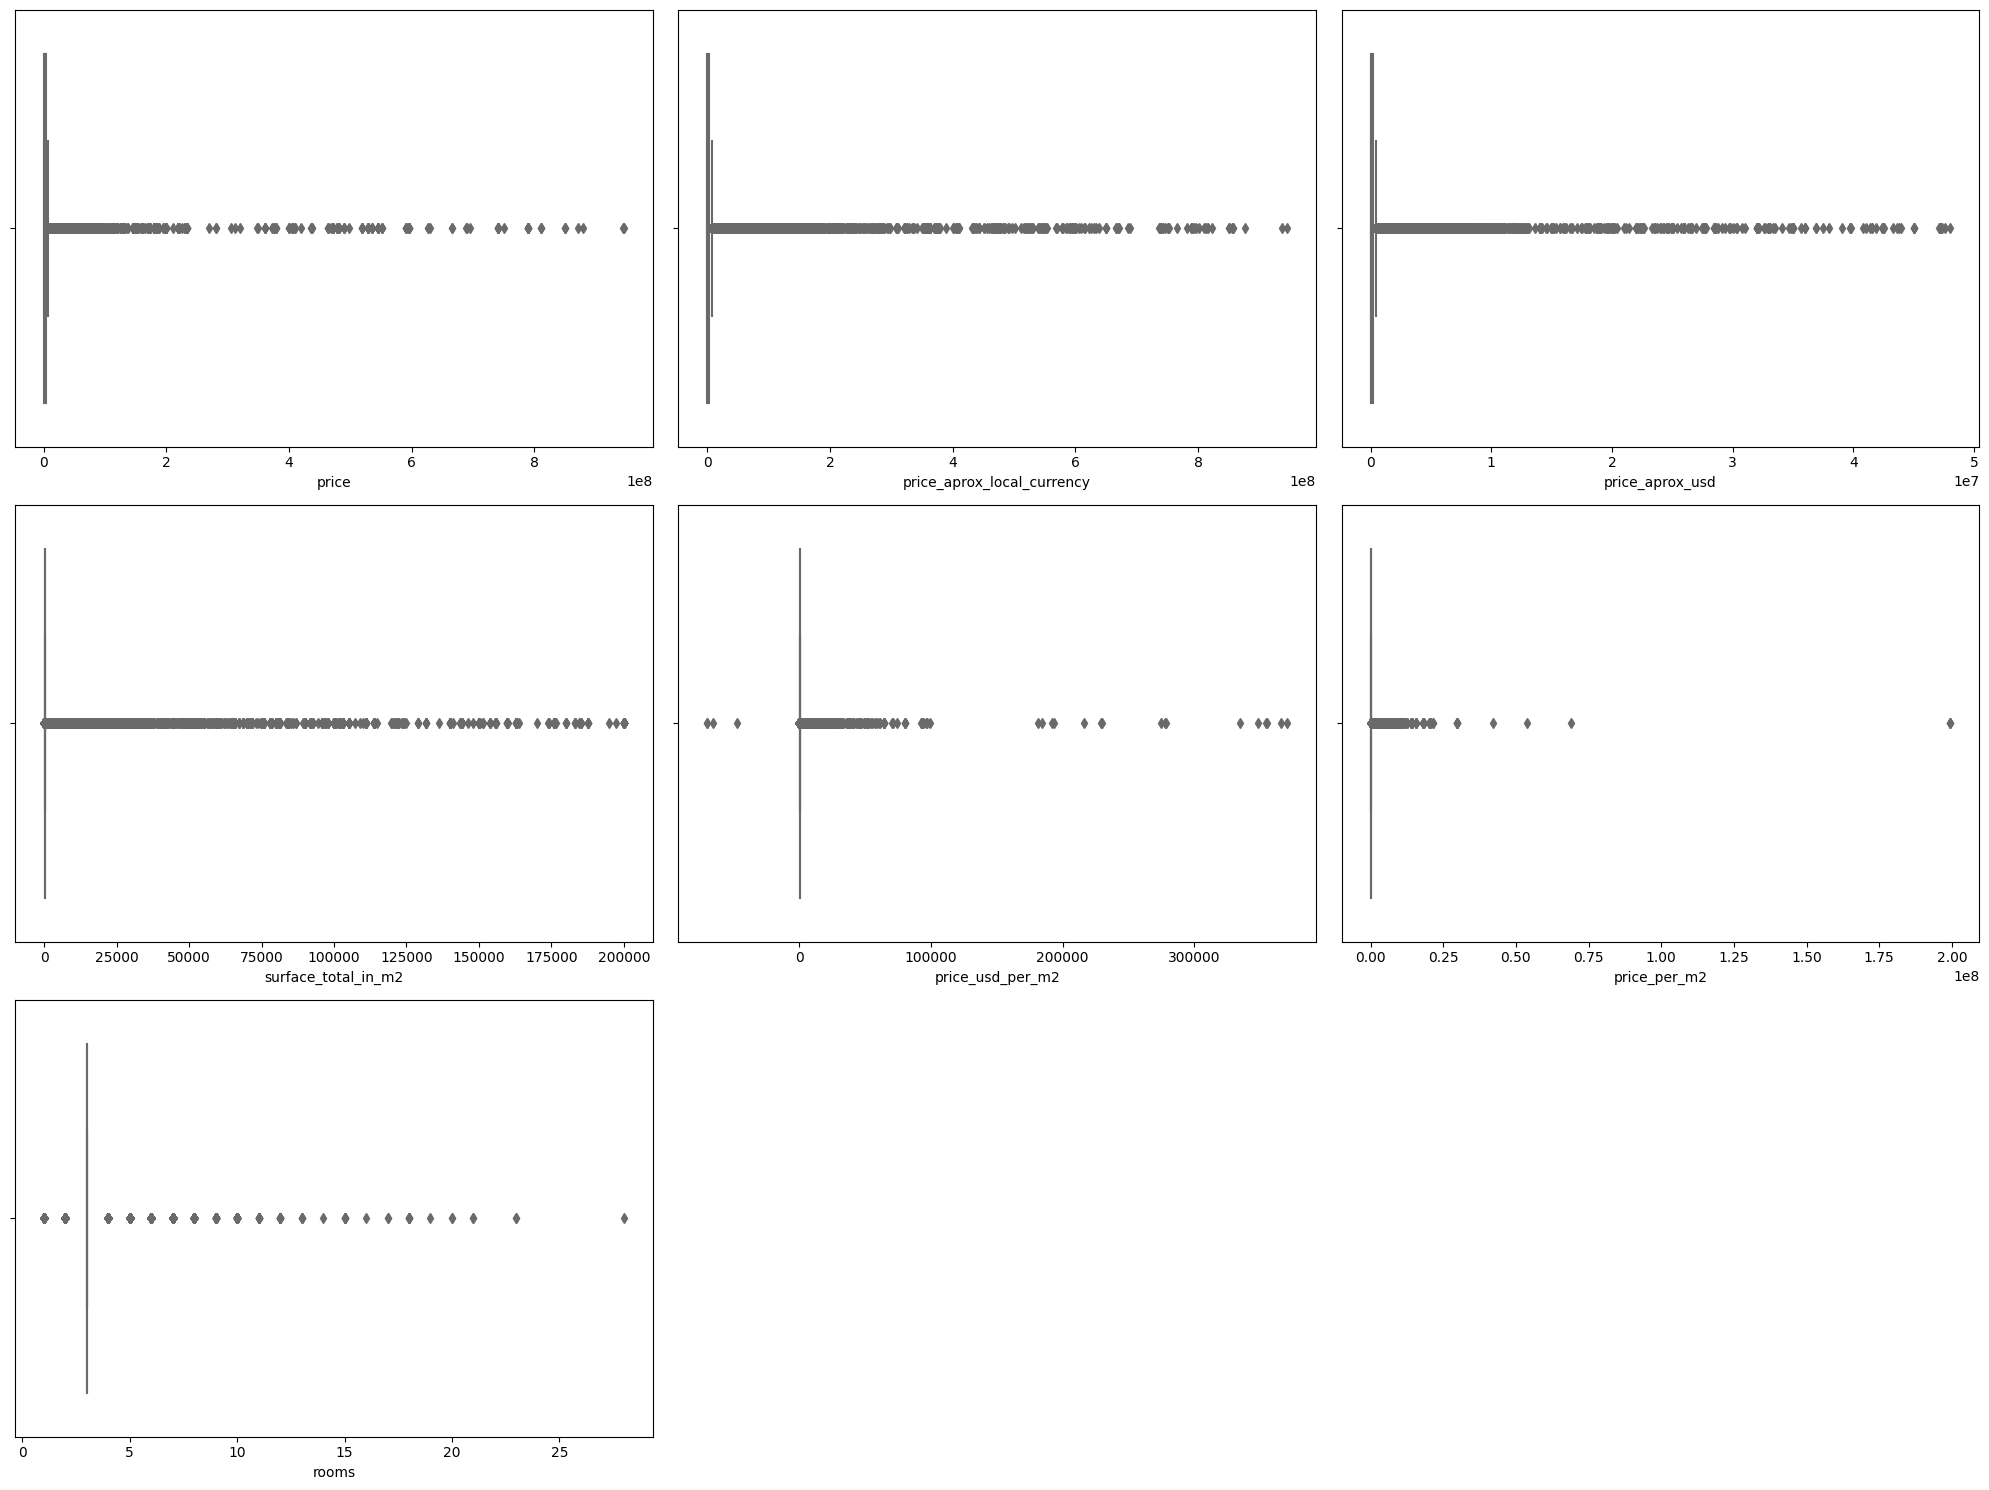

In [41]:
# Define the quantitative variables
quantitative_cols = ['price', 'price_aprox_local_currency', 'price_aprox_usd',
                     'surface_total_in_m2', 'price_usd_per_m2', 'price_per_m2', 'rooms']

# Create a figure with a grid of plots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axs = axs.flatten()

# Create a boxplot for each variable and add it to the corresponding subplot
for i, col in enumerate(quantitative_cols):
    sn.boxplot(x=data_estate[col], ax=axs[i], palette='Set3')
    axs[i].set_xlabel(col)

# Remove any extra subplots
for i in range(len(quantitative_cols), len(axs)):
    axs[i].remove()

plt.tight_layout()
plt.show()

# Filter out rows with negative values in 'price_usd_per_m2' and 'rooms'


In [50]:
data_estate = data_estate[(data_estate['price_usd_per_m2'] > 0) & (data_estate['rooms'] > 0)]

In [51]:
data_estate.shape

(1705769, 14)

# According to this analysis we have no typographical errors.

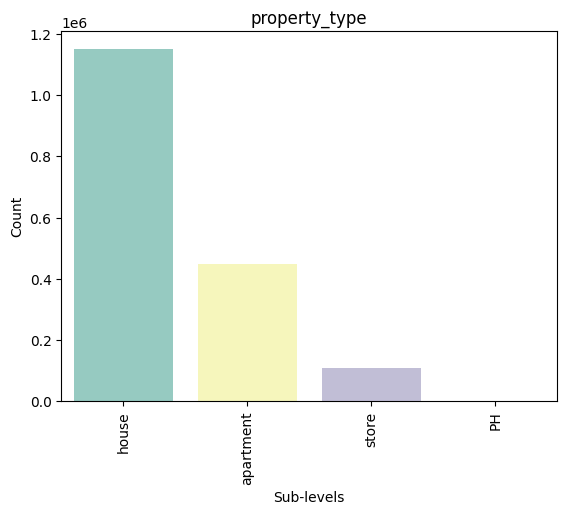

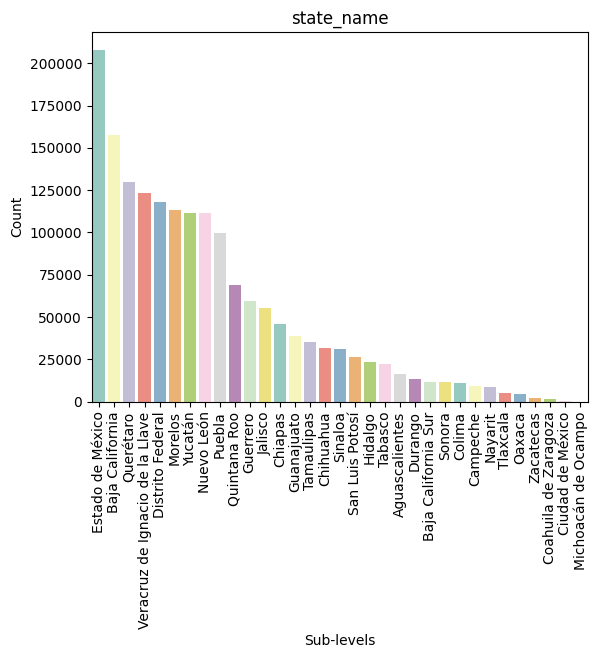

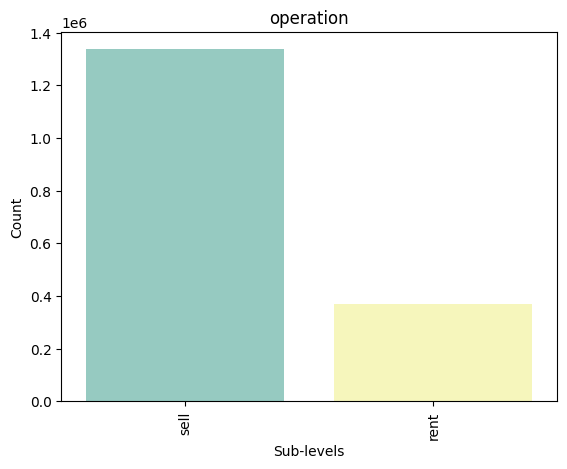

In [53]:
categorical_cols = ['property_type', 'state_name', 'operation']

for col in categorical_cols:
    sublevels = data_estate[col].value_counts()
    fig, ax = plt.subplots()
    sn.barplot(x=sublevels.index, y=sublevels.values, ax=ax, palette="Set3")
    ax.set_title(f"{col}")
    ax.set_xlabel("Sub-levels")
    ax.set_ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

># Our initial dataset contained (3148360, 21), but after data cleansing, we now have a dataset containing (1705769, 14). This new dataset will serve as the basis for our exploratory data analysis.


In [55]:
path = '/content/drive/MyDrive/DataScience_UWinnipeg/properati_properties_Mexico_clean.csv'
data_estate.to_csv(path)